# 46-932, Simulation Methods for Option Pricing: Homework 3

*Author*: Jordan Giebas <br>
*Due Date*: Feb. 8, 2018

## Question 1: 
Practice on antithetic variables with Black-Scholes. The paramters are given as follows:<br>
<ul>
    <li> $S_{0} = 100$
    <li> $T = 1$
    <li> $r = 0.05$
    <li> $\sigma = 0.10$
    <li> $c_{0}^{BS} = 6.805$
</ul>

### Part (a)
Price the option using standard MCS for a sample size of $n=10,000$ and strike-levels $K=95, 100, 105$.

At strike 95: Estimated Price 10.442265, StdError 9.005453
At strike 100: Estimated Price 6.854460, StdError 7.760601
At strike 105: Estimated Price 4.177502, StdError 6.338703


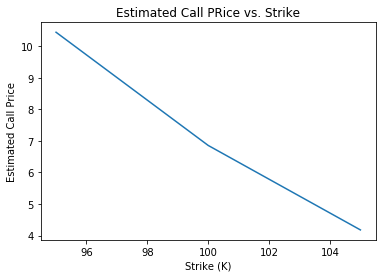

In [293]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def S_T(S_0,rfr,vol,dT):

    return ( S_0*np.exp((rfr-0.5*(vol**2))*dT + vol*np.sqrt(dT)*np.random.standard_normal()) )

def discounted_payoff(S_T, K, rfr, T):
    
    return ( np.exp(-1.0*rfr*T)*np.maximum(S_T-K,0) )

  
"""
Parameters, Global Vars
"""
S_0 = 100
K_list = [95,100,105]
rfr = 0.05
vol = 0.10
dT = 1

# Store each discounted payoff for all scenarios, for each K
c_i_95  = [discounted_payoff(S_T(S_0,rfr,vol,dT),K_list[0], rfr, dT) for i in range(10000)]
c_i_100 = [discounted_payoff(S_T(S_0,rfr,vol,dT),K_list[1], rfr, dT) for i in range(10000)]
c_i_105 = [discounted_payoff(S_T(S_0,rfr,vol,dT),K_list[2], rfr, dT) for i in range(10000)]

# Report results
print( "At strike %i: Estimated Price %f, StdError %f" % (K_list[0], np.mean(c_i_95), np.std(c_i_95)) )
print( "At strike %i: Estimated Price %f, StdError %f" % (K_list[1],np.mean(c_i_100), np.std(c_i_100)) )
print( "At strike %i: Estimated Price %f, StdError %f" % (K_list[2],np.mean(c_i_105), np.std(c_i_105)) )

# Plots the estimated price as a function of strike
plt.xlabel("Strike (K)")
plt.ylabel("Estimated Call Price")
plt.title("Estimated Call PRice vs. Strike")
plt.plot(K_list, [np.mean(c_i_95),np.mean(c_i_100),np.mean(c_i_105)])

The above graph is sensible in that as the strike increases, the probability of the European option ending in the money becomes less likely. Hence, the current price of the option should be inversely proportional to the strike - as seen above. 

### Part (b)
Repeat the above using the antithetic procedure. 

In [254]:
def ant_S_T(S_0,rfr,vol,dT):

    return ( S_0*np.exp((rfr-0.5*(vol**2))*dT + -1.0*vol*np.sqrt(dT)*np.random.standard_normal()) )


# Store each (non-antithetic) discounted payoff for all scenarios, for each K
c_i_95  = [discounted_payoff(S_T(S_0,rfr,vol,dT),K_list[0], rfr, dT) for i in range(10000)]
c_i_100 = [discounted_payoff(S_T(S_0,rfr,vol,dT),K_list[1], rfr, dT) for i in range(10000)]
c_i_105 = [discounted_payoff(S_T(S_0,rfr,vol,dT),K_list[2], rfr, dT) for i in range(10000)]

# Store each (non-antithetic) discounted payoff for all scenarios, for each K
c_i_95_ant  = [discounted_payoff(ant_S_T(S_0,rfr,vol,dT),K_list[0], rfr, dT) for i in range(10000)]
c_i_100_ant = [discounted_payoff(ant_S_T(S_0,rfr,vol,dT),K_list[1], rfr, dT) for i in range(10000)]
c_i_105_ant = [discounted_payoff(ant_S_T(S_0,rfr,vol,dT),K_list[2], rfr, dT) for i in range(10000)]

# Obtain averages
c_95_avg  = [0.5*(x+y) for x, y in zip(c_i_95_ant, c_i_95)]
c_100_avg = [0.5*(x+y) for x, y in zip(c_i_100_ant, c_i_100)]
c_105_avg = [0.5*(x+y) for x, y in zip(c_i_105_ant, c_i_105)]


# Report results
print("\nMC Estimates and Standard Errors\n")
print( "At strike %i: Estimated Price %f, StdError %f" % (K_list[0], np.mean(c_95_avg), np.std(c_95_avg)) )
print( "At strike %i: Estimated Price %f, StdError %f" % (K_list[1],np.mean(c_100_avg), np.std(c_100_avg)) )
print( "At strike %i: Estimated Price %f, StdError %f" % (K_list[2],np.mean(c_105_avg), np.std(c_105_avg)) )

# Report variance reduction factors
print("\nVariance Reduction Factors\n")
print( "At strike %i: the variance was reduced by a factor of %f" % (K_list[0], np.std(c_95_avg)/np.std(c_i_95)) )
print( "At strike %i: the variance was reduced by a factor of %f" % (K_list[1], np.std(c_100_avg)/np.std(c_i_100)) )
print( "At strike %i: the variance was reduced by a factor of %f" % (K_list[2], np.std(c_105_avg)/np.std(c_i_105)) )


MC Estimates and Standard Errors

At strike 95: Estimated Price 10.408706, StdError 6.279401
At strike 100: Estimated Price 6.935312, StdError 5.517318
At strike 105: Estimated Price 4.064135, StdError 4.443980

Variance Reduction Factors

At strike 95: the variance was reduced by a factor of 0.709768
At strike 100: the variance was reduced by a factor of 0.705687
At strike 105: the variance was reduced by a factor of 0.696684


The above results suggest that, regardless of the strike, we see approximately a 70% reduction in variance! Pretty good!

## Question 2

Consider the price process $\{S_{t}, t \geq 0\}$ governed by a geometric brownian motion with drift $\mu = 0.10$, and volatility $\sigma = 0.10$ per year. The risk-free rate is $r = 0.05$, and the initial asset price is $S_{0} = 100$. Suppose the interval $[0,T]$ is divided into $N$ equal time steps with strike $K=100$. Assume that $T=1$ and $N=52$. Using the notation that $S_{i\Delta}$ is the asset price at time $i\Delta$, the option payoff is given by: $$payoff= \bigg(\frac{1}{N}\sum_{i=1}^{N} S_{i\Delta} - K\bigg)^{+}$$

### Part (a)

Use standard MCS with $n=10,000$ paths, estimate the price of this option and provide a standard error. 

In [255]:
# import needed libraries
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats 
from scipy.stats import norm, gmean
from math import log, sqrt, exp

# Define parameters, global vars
mu      = 0.10
sig     = 0.10
rfr     = 0.05
S_0     = K = 100.0
N       = 52
T       = 1.0
nopaths = 1000

In [256]:
# Generate price process for a single path
def price_process( N, T, r, sig, S_0 ):
    
    dt      = T/float(N)
    t_space = np.linspace(0, T, N)                      # Partition the interval
    Z       = np.random.standard_normal(size = N)       # Generate appropriate number of standard normals
    W       = np.cumsum(Z)*np.sqrt(dt)*sig              # Take cumulative sum and multiply by sqrt(dt)*\sig
    S_t     = S_0*np.exp((r-0.5*sig**2)*t_space + W)    # Generate price process
    
    return S_t

# For a given path, return discounted arithmetic asian payoff
def discounted_arithmetic_asian( S_t, r, T, K ):
    
    return ( np.exp(-1.0*r*T)*(np.maximum((np.mean(S_t) - K),0)) )

# For a given path, return discounted geometric asian payoff
def discounted_geometric_asian(S_t, rfr, T, K):
    
    return ( np.exp(-1.0*rfr*T)*(np.maximum((gmean(S_t) - K),0)) )
    

In [257]:
# Get the discounted payoff of each price process for each path
all_paths = [discounted_arithmetic_asian(price_process(N,T,rfr,sig,S_0), rfr, T, K) for i in range(nopaths)]

In [258]:
print("Mean: ", np.mean(all_paths))
print("Std Error : ", np.std(all_paths)/np.sqrt(nopaths))

Mean:  3.82956792539
Std Error :  0.134711451028


### Part (b)
Generate antithetic processes and take the discounted payoff. Report the estimate for the option price and the standard error. Remark on any variance reduction. 

In [259]:
# Generate (antithetic) price process for a single path
def ant_price_process( N, T, r, sig, S_0 ):
    
    dt      = T/float(N)
    t_space = np.linspace(0, T, N)                      # Partition the interval
    Z       = -1.0*np.random.standard_normal(size = N)       # Generate appropriate number of standard normals
    W       = np.cumsum(Z)*np.sqrt(dt)*sig              # Take cumulative sum and multiply by sqrt(dt)*\sig
    S_t     = S_0*np.exp((r-0.5*sig**2)*t_space + W)    # Generate price process
    
    return S_t

In [261]:
# Get the discounted payoff of each (antithetic) price process for each path
ant_all_paths = [discounted_arithmetic_asian(ant_price_process(N,T,rfr,sig,S_0), rfr, T, K) for i in range(nopaths)]

In [262]:
# Get the average of the antithetic and normal discounted payoffs
avg_payoff = [0.5*(x+y) for x, y in zip(all_paths, ant_all_paths)]

In [263]:
# Report the mean and the std error here
print("Mean: ", np.mean(avg_payoff))
print("Std. Error: ", np.std(avg_payoff)/np.sqrt(nopaths))

Mean:  3.82202625867
Std. Error:  0.0944279983656


### Part (c)
Estimate the option price using $\bar{S}_{N}$ as a control variable.

In [266]:
# Define a list of all the price processes (list of lists)
pp_ = [price_process(N,T,rfr,sig,S_0) for n in range(1000)]
Y_  = [discounted_arithmetic_asian(S_t, rfr, T, K) for S_t in pp_]      
X_  = [S_t[-1] for S_t in pp_]

# Get quantities needed for adjustment
Y_bar = np.mean(Y_)
X_bar = np.mean(X_)
a_hat = -1.0*np.corrcoef(X_,Y_)[0][1]*(np.std(Y_)/np.std(X_))

Y_adj = [y + a_hat*(x - S_0*np.exp(rfr*T)) for x,y in zip(X_,Y_)]

print( "Control Variable Mean: ", np.mean(Y_adj) )
print( "Control Variable Std. Error: ", np.std(Y_adj)/np.sqrt(1000))

Control Variable Mean:  3.55538993131
Control Variable Std. Error:  0.0757480687947


By the above, we can see that we have a tremendous reduction in variance but our option price is far off from that given by standard MC and the simulation ran using antithetics. <br>
I claim that using the terminal value in a price process to adjust our estimates of the asian call is not wise, as the two problems are quite far apart. <br>
If using the geometric asian option as a control variable when simulating the price of the arithmetic asian option yields a value similar to the standard MC/antithetic cases above with a reduction in variance, this will confirm my claim above. 

### Part (d) 
Use the (asymptotic) geometric asian option as a control variable. 
$\sigma^{*} = \frac{\sigma}{3}$ and $d^{*} = \frac{r+d}{2} + \frac{\sigma^2}{12}$. <br>
**Note:** Dividends are zero, hence $d^{*} = \frac{r}{2} + \frac{\sigma^2}{12}$

In [267]:
# Define necessary functions for BS (with dividends) price
def d_plus( x, K, tau, sigma, rfr, q ):
    
    return ( (log(x/K) + ((rfr - q + 0.5*(sigma**2))*tau))/(sigma*sqrt(tau)) )

def d_minus( x, K, tau, sigma, rfr, q ):
    
    return ( d_plus(x, K, tau, sigma, rfr, q) - sigma*sqrt(tau) )

def BS_price( x, K, r, sigma, tau, q ):
    
    d_1 = d_plus(x, K, tau, sigma, rfr, q)
    d_2 = d_minus(x, K, tau, sigma, rfr, q)
    
    return ( x*exp(-1.0*q*tau)*norm.cdf(d_1) - K*exp(-1.0*rfr*tau)*norm.cdf(d_2) )

In [269]:
## Control var = geometric asian

# Define a list of all the price processes (list of lists)
pp_ = [price_process(N,T,rfr,sig,S_0) for n in range(1000)]
Y_  = [discounted_arithmetic_asian(S_t, rfr, T, K) for S_t in pp_]    
X_  = [discounted_geometric_asian(S_t, rfr, T, K) for S_t in pp_]

# Get quantities needed for adjustment
Y_bar = np.mean(Y_)
X_bar = np.mean(X_)
a_hat = -1.0*np.corrcoef(X_,Y_)[0][1]*(np.std(Y_)/np.std(X_))

# Define closed form solution to find residual, adjust estimate
q_star   = rfr/2.0 + sig**2/12.0
sig_star = sig/sqrt(3.0)
cform    = BS_price(S_0, K, rfr, sig_star, T, q_star)

Y_adj = [y + a_hat*(x - cform) for x,y in zip(X_,Y_)]
print( "Control Variable Mean: ", np.mean(Y_adj) )
print( "Control Variable Std. Error : ", np.std(Y_adj)/np.sqrt(1000)  )

Control Variable Mean:  3.64185056669
Control Variable Std. Error :  0.00183599006449


Crazy variance reduction.

### Part (e) 
Use the exact price of the geometric Asian option instead of the asymptotic version given above. 

In [273]:
## Control var = geometric asian

# Define a list of all the price processes (list of lists)
pp_ = [price_process(N,T,rfr,sig,S_0) for n in range(1000)]
Y_  = [discounted_arithmetic_asian(S_t, rfr, T, K) for S_t in pp_]    
X_  = [discounted_geometric_asian(S_t, rfr, T, K) for S_t in pp_]

# Get quantities needed for adjustment
Y_bar = np.mean(Y_)
X_bar = np.mean(X_)
a_hat = -1.0*np.corrcoef(X_,Y_)[0][1]*(np.std(Y_)/np.std(X_))

# Define closed form solution to find residual, adjust estimate
q_star   = rfr*((N-1)/(2*N)) + (sig**2)*((N**2 - 1)/(12*(N**2)))
sig_star = sig*sqrt(((N+1)*((2*N)+1)/(6*(N**2))))
cform    = BS_price(S_0, K, rfr, sig_star, T, q_star)

Y_adj = [y + a_hat*(x - cform) for x,y in zip(X_,Y_)]
print( "Control Variable Mean: ", np.mean(Y_adj) )
print( "Control Variable Std. Error: ", np.std(Y_adj)/np.sqrt(1000)  )

Control Variable Mean:  3.70362936289
Control Variable Std. Error:  0.00209778552845


The variance is heavily reduced and the mean is stabilizing to the others found in simulations above. 

## Question 3

We're interested in the benefits of importance sampling as the strike, $K$, and the option becomes out of the money. We're pricing a European call option with the following parameters:

<ul>
    <li> $S_{0} = 100$
    <li> $T = 1$
    <li> $\mu = 0.10$
    <li> $r = 0.05$
    <li> $\sigma = 0.20$


### Part (a)
Standard MC with $n=10000$ paths for $K=120,140,160$

In [277]:
# Define global vars. 
S_0 = 100
K_list = [120,140,160]
nopaths = 100000
rfr = 0.05
vol = 0.20
mu = 0.10
dT = 1

# Store each discounted CALL payoff for all scenarios, for each K
c_i_120  = [discounted_payoff(S_T(S_0,rfr,vol,dT),K_list[0], rfr, dT) for i in range(nopaths)]
c_i_140 = [discounted_payoff(S_T(S_0,rfr,vol,dT),K_list[1], rfr, dT) for i in range(nopaths)]
c_i_160 = [discounted_payoff(S_T(S_0,rfr,vol,dT),K_list[2], rfr, dT) for i in range(nopaths)]

# Report results
print( "At strike %i: Estimated Price %f, StdError %f" % (K_list[0],np.mean(c_i_120),  np.std(c_i_120)/np.sqrt(nopaths)) )
print( "At strike %i: Estimated Price %f, StdError %f" % (K_list[1],np.mean(c_i_140), np.std(c_i_140)/np.sqrt(nopaths)) )
print( "At strike %i: Estimated Price %f, StdError %f" % (K_list[2],np.mean(c_i_160), np.std(c_i_160)/np.sqrt(nopaths)) )

# Print BS price
print( "At strike %i: BS Price %f" % (K_list[0], BS_price(S_0, K_list[0], rfr, vol, dT, 0)) )
print( "At strike %i: BS Price %f" % (K_list[1], BS_price(S_0, K_list[1], rfr, vol, dT, 0)) )
print( "At strike %i: BS Price %f" % (K_list[2], BS_price(S_0, K_list[2], rfr, vol, dT, 0)) )

At strike 120: Estimated Price 3.273199, StdError 0.027715
At strike 140: Estimated Price 0.777710, StdError 0.013387
At strike 160: Estimated Price 0.155682, StdError 0.005790
At strike 120: BS Price 3.247477
At strike 140: BS Price 0.784965
At strike 160: BS Price 0.158954


Notice above how much we're overshooting the price of the call when the strike is large. 

### Part (b)
Using put-call parity to eliminate the plethora of zeros we must be getting for each of the various scenarios. 

In [276]:
# Define new payoff function for european put
def discounted_put_payoff(S_T, K, rfr, T):
    
    return ( np.exp(-1.0*rfr*T)*np.maximum(K-S_T,0) )

def apply_pcp( P, K ):
    
    return ( P + S_0 - K*np.exp(-1.0*rfr*dT) )

# Store each discounted PUT payoff for all scenarios, for each K
c_i_120  = [apply_pcp(discounted_put_payoff(S_T(S_0,rfr,vol,dT),K_list[0], rfr, dT), K_list[0]) for i in range(nopaths)]
c_i_140 = [apply_pcp(discounted_put_payoff(S_T(S_0,rfr,vol,dT),K_list[1], rfr, dT), K_list[1]) for i in range(nopaths)]
c_i_160 = [apply_pcp(discounted_put_payoff(S_T(S_0,rfr,vol,dT),K_list[2], rfr, dT), K_list[2]) for i in range(nopaths)]

# Report results
print( "At strike %i: Estimated Price %f, StdError %f" % (K_list[0],np.mean(c_i_120),  np.std(c_i_120)/np.sqrt(nopaths)) )
print( "At strike %i: Estimated Price %f, StdError %f" % (K_list[1],np.mean(c_i_140), np.std(c_i_140)/np.sqrt(nopaths)) )
print( "At strike %i: Estimated Price %f, StdError %f" % (K_list[2],np.mean(c_i_160), np.std(c_i_160)/np.sqrt(nopaths)) )

# Print BS price
print( "At strike %i: BS Price %f" % (K_list[0], BS_price(S_0, K_list[0], rfr, vol, dT, 0)) )
print( "At strike %i: BS Price %f" % (K_list[1], BS_price(S_0, K_list[1], rfr, vol, dT, 0)) )
print( "At strike %i: BS Price %f" % (K_list[2], BS_price(S_0, K_list[2], rfr, vol, dT, 0)) )

At strike 120: Estimated Price 3.206514, StdError 0.046832
At strike 140: Estimated Price 0.770495, StdError 0.058150
At strike 160: Estimated Price 0.170026, StdError 0.062492
At strike 120: BS Price 3.247477
At strike 140: BS Price 0.784965
At strike 160: BS Price 0.158954


We see an increase in variance. This is sensible, since we have changed to evaluating puts which will yield more diverse values in their payoffs whereas many OTM calls would yield the value zero, reducing the variance.

### Part (c)
Repeat part(b) using the terminal stock price $S_{T}$ as a control variable. 

In [302]:
# Define global vars. 
S_0 = 100
K_list = [120,140,160]
nopaths = 100000
rfr = 0.05
vol = 0.20
mu = 0.10
dT = 1

for K in K_list:

    # Define a list of all the price processes (list of lists)
    pp_ = [price_process(N,T,rfr,sig,S_0) for n in range(10000)]
    Y_  = [discounted_payoff(S_t[-1], rfr, T, K) for S_t in pp_]      
    X_  = [S_t[-1] for S_t in pp_]

    
    """
    # Get quantities needed for adjustment
    Y_bar = np.mean(Y_)
    X_bar = np.mean(X_)
    a_hat = -1.0*np.corrcoef(X_,Y_)[0][1]*(np.std(Y_)/np.std(X_))

    Y_adj = [y + a_hat*(x - S_0*np.exp(rfr*T)) for x,y in zip(X_,Y_)]

    print("\n === K = %i === " % K)
    print( "Control Variable Mean: ", np.mean(Y_adj) )
    print( "Control Variable Std. Error: ", np.std(Y_adj)/np.sqrt(1000))
    """


### Part (d)
Repeat this problem so the measure ensures that the option pays off with almost surely. 

In [314]:
from scipy.stats import norm

S_0 = 100
K_list = [120,140,160]
nopaths = 100000
rfr = 0.05
vol = 0.20
mu = 0.10
dT = 1
for K in K_list:

    c_list = []
    for i in range(10000):

        # Define L as in lecture notes
        L = (np.log(K/S_0) - (r-0.5*sig**2)*T)/(sig*np.sqrt(T))
        U = np.random.uniform()
        X = norm.ppf(U*(1-norm.cdf(L)) + norm.cdf(L))

        # Call price process
        S_t = price_process(1,1,rfr,sig,S_0)

        c_list.append( np.exp(-r*T)*(S_t - K)*(1-norm.cdf(L)) )

    print("\n=== K = %i ===" % K)
    print("Estimated Price: ", np.mean(c_list))
    print("Std. Error: ", np.std(c_list)/np.sqrt(10000))
    


 === K = 120 ===
Estimated Price:  -0.132721736283
Std. Error:  0.00105864568904

 === K = 140 ===
Estimated Price:  -3.84222375318e-05
Std. Error:  1.51603022602e-07

 === K = 160 ===
Estimated Price:  -4.51376130728e-10
Std. Error:  1.18196395673e-12


## Question 4

Pricing a *down-and-in barrier option* with lower barrier $H$. <br>
The option parameters are listed below: <br>
<ul>
    <li> $T=0.25$
    <li> $m=50$
    <li> $H \in \{94,90,85,90\}$
    <li> $K \in \{96,96,96,106\}$
</ul>
The price process parameters are as follows: <br>
<ul>
    <li> $r=0.05$
    <li> $\sigma=0.15$
    <li> $S_{0}=95$ 
</ul>
We run $n=100,000$ simulations for each scenario.

### Part (a)
Using standard Monte Carlo, price an option with 

$$ payoff = \mathbb{1}\{S_T > K\}\mathbb{1}\{M < H\} $$

Where,

$$ M := min \{S_t, \forall t\} $$

In [296]:
# Define the option paramters
H_list = [94,90,85,90]
K_list = [96,96,96,106]
T = 0.25
m = 50
delta = T/m

# Define price process parameters
r   = 0.05
sig = 0.15
S_0 = 95

## payoff function (for list comprehension)
def indicator( S_t, H, K ):
    
    return (S_t[-1] > K) * (np.min(S_t) < H)

for H, K in zip(H_list, K_list):
            
    L = [ np.exp(-r*T)*indicator(price_process(m,T, r, sig, S_0), H, K) for i in range(100000)]  
    
    print("\nH: ", H)
    print("K: ", K)
    print("Option price: ", 10000*np.mean(L))
    print("Std. Error: ", np.std(L)/np.sqrt(100000))
    


H:  94
K:  96
Option price:  3006.87812916
Std. Error:  0.00143714803719

H:  90
K:  96
Option price:  434.336716657
Std. Error:  0.000640372126944

H:  85
K:  96
Option price:  5.43167790272
Std. Error:  7.32205859282e-05

H:  90
K:  106
Option price:  12.7397536264
Std. Error:  0.000112094905027


These seem relatively close to the Glasserman text.

### Part (b)

#### i

Assuming that the price process follows a GBM as above, derive an expression for the price of a digital option **with no knock-in barrier**. I.e., this option will pay $\mathbb{1}\{S_T > K\}$ at time $T$. <br>

By the risk-netural pricing formula, we may write the price of the option as the expecected value of the discounted payoff,

$$ P(S_0,K,r,\sigma,T) = \mathbb{E}^{Q}\bigg[e^{-rT}\mathbb{1}_{\{S_T > K\}}\bigg]$$

Where $Q$ denotes the expectation with respect to the risk-neutral measure (since tildes are nearly impossible in latex......)

The derivation for $P(S_0,K,r,\sigma,T)$ is done below: <br>

$$ \mathbb{E}^{Q}\bigg[e^{-rT}\mathbb{1}_{\{S_T > K\}}\bigg] = e^{-rT}\mathbb{P}^{Q}\bigg[S_T > K\bigg] $$

$$ \mathbb{P}^{Q}\bigg[S_T > K\bigg] = 1 - \mathbb{P}^{Q}\bigg[S_T \leq K\bigg] $$

We now perform algebra using the closed-form expression for $S_T$,

$$  $$

$$ S_T \leq K \iff S_0exp\bigg((r-\frac{\sigma^2}{2})T + \sigma\sqrt{T}Z\bigg) \leq K $$
$$ \iff Z \leq \frac{ln\big(\frac{K}{S_0}\big) - (r-\frac{1}{2}\sigma^2)T\big)}{\sigma\sqrt{T}} := d $$

Since $Z \sim N(0,1)$, it follows that,

$$ \mathbb{P}^{Q}\big[S_T > K\big] = 1 - \mathbb{P}^{Q}\big[S_T \leq K\big] = 1 - \Phi(d) = \Phi(-d) $$

Hence, the payoff of our option is given by 

$$ P(S_0,K,r,\sigma,T) = e^{-rT}\Phi(-d) $$

#### ii

Simulating a path using Conditional Monte Carlo techniques.

In [297]:
# Closed-form digital option function
def digital_payoff( S_0, K, r, sig, T):
    
    d = (np.log(K/S_0) - (r-0.5*sig**2)*T)/(sig*np.sqrt(T))

    return np.exp(-r*T)*norm.cdf(-d)


# Loop for each pair of H, K
for H, K in zip(H_list, K_list):

    # Loop for each simulation
    dpayoff_list = [0 for i in range(100000)]
    for i in range(100000):

        pp = [S_0]
        for k in range(1,m):

            S_kp1 = pp[-1]*np.exp( (r-0.5*sig**2)*delta + sig*np.sqrt(delta)*np.random.standard_normal() )
            pp.append(S_kp1)

            if S_kp1 >= H:
                continue  
            else:
                tau = T-k*delta
                dpayoff_list[i] = np.exp(-r*tau)*digital_payoff(pp[-1], K, r, sig, tau)
                break    
                
    print("\n === RESULTS ===")
    print("H: ", H)
    print("K: ", K)
    print("Estimated option price: ", np.mean(dpayoff_list))
    print("Standard Error: ", np.std(dpayoff_list)/np.sqrt(100000))


 === RESULTS ===
H:  94
K:  96
Estimated option price:  0.29879187802
Standard Error:  0.000500579682904

 === RESULTS ===
H:  90
K:  96
Estimated option price:  0.0424953170949
Standard Error:  0.000209284684241

 === RESULTS ===
H:  85
K:  96
Estimated option price:  0.000565402464861
Standard Error:  1.00057769098e-05

 === RESULTS ===
H:  90
K:  106
Estimated option price:  0.00131110099218
Standard Error:  9.09146822788e-06


#### iii
Refer to results instead of 'table'. 

## Question 5

Analyzing a "down-and-in" option with 

$$ payoff = (S_T - K)^{+}\mathbb{1}_{\{M<H\}} $$

The parameters are given as follows: <br>

<ul>
    <li> $S_0 = K = 100$
    <li> $H = 95$
    <li> $\sigma = 0.30$
    <li> $r=0.10$
    <li> $T=0.2$
</ul>

### Part (a) 
Use standard MCS to estimate the price of the down-and-in call for $N=25$ and $N=50$

In [301]:
# Define the parameters
S_0 = K = 100
H = 95
vol = 0.30
r = 0.10
T = 0.2
n = 100000

# CASE I: N = 25
N = 25

d_payoff_list = []
for i in range(n):

    # Generaete Price Process
    S_t = price_process(N, T, r, vol, S_0)
    
    # Retrieve payoff
    d_payoff = np.exp(-r*T)*max(S_t[-1]-K, 0)*(np.min(S_t) < H)
    d_payoff_list.append( d_payoff )

print("Case I: N = 25")
print("estimate: ", np.mean(d_payoff_list))
print("std error: ", np.std(d_payoff_list)/np.sqrt(n))

# CASE II: N = 50
N = 50

d_payoff_list = []
for i in range(n):

    # Generaete Price Process
    S_t = price_process(N, T, r, vol, S_0)
    
    # Retrieve payoff
    d_payoff = np.exp(-r*T)*max(S_t[-1]-K, 0)*(np.min(S_t) < H)
    d_payoff_list.append( d_payoff )

print("\nCase II: N = 50")
print("estimate: ", np.mean(d_payoff_list))
print("std error: ", np.std(d_payoff_list)/np.sqrt(n))


Case I: N = 25
estimate:  1.29151343637
std error:  0.0127102226895

Case II: N = 50
estimate:  1.42265241217
std error:  0.0133079266048


### Part (b) 
Using conditional monte carlo whenever the price path falls below $H$. Report the estimates along with the standard errors for the $N=25$ and $N=50$ cases.

In [308]:
# Define the parameters
S_0 = K = 100
H = 95
vol = 0.30
r = 0.10
T = 0.2
n = 100000


# Closed-form digital option function
def cdi_hull_payoff( S_0, K, r, sig, T, H):
    
    lam = (r+0.5*sig**2)/(sig**2)
    y = (np.log(H**2/(S_0*K))/(sig*np.sqrt(T))) + lam*sig*np.sqrt(T)
    
    return S_0*((H/S_0)**(2*lam))*norm.cdf(y) - K*np.exp(-r*T)*((H/S_0)**(2*lam-2))*norm.cdf(y-sig*np.sqrt(T))

# Define the parameters
S_0 = K = 100
H = 95
vol = 0.30
r = 0.10
T = 0.2
n = 100000

# CASE I: N = 25
N = 25
delta = T/N

# Loop for each simulation
dpayoff_list = [0 for i in range(100000)]
for i in range(100000):

    pp = [S_0]
    for k in range(1,N):

        S_kp1 = pp[-1]*np.exp( (r-0.5*sig**2)*delta + sig*np.sqrt(delta)*np.random.standard_normal() )
        pp.append(S_kp1)

        if S_kp1 >= H:
            continue  
        else:
            tau = T-k*delta
            dpayoff_list[i] = np.exp(-r*tau)*cdi_hull_payoff(pp[-1], K, r, sig, tau, H)
            break    

print("\nCase I: N = 25")
print("H: ", H)
print("K: ", K)
print("Estimated option price: ", np.mean(dpayoff_list))
print("Standard Error: ", np.std(dpayoff_list)/np.sqrt(100000))


# CASE II: N = 50
N = 50
delta = T/N

# Loop for each simulation
dpayoff_list = [0 for i in range(100000)]
for i in range(100000):

    pp = [S_0]
    for k in range(1,N):

        S_kp1 = pp[-1]*np.exp( (r-0.5*sig**2)*delta + sig*np.sqrt(delta)*np.random.standard_normal() )
        pp.append(S_kp1)

        if S_kp1 >= H:
            continue  
        else:
            tau = T-k*delta
            dpayoff_list[i] = np.exp(-r*tau)*cdi_hull_payoff(pp[-1], K, r, sig, tau, H)
            break    

print("\nCase II: N = 50")
print("H: ", H)
print("K: ", K)
print("Estimated option price: ", np.mean(dpayoff_list))
print("Standard Error: ", np.std(dpayoff_list)/np.sqrt(100000))


Case I: N = 25
H:  95
K:  100
Estimated option price:  0.217918038887
Standard Error:  0.00138624023722

Case II: N = 50
H:  95
K:  100
Estimated option price:  0.220466490191
Standard Error:  0.00131034964204


### Part (c)

Changing the distribution of the normals so they're centered around $\theta=-0.45,-0.30$ respecitively for $N=25,50$

In [309]:
# Define the parameters
S_0 = K = 100
H = 95
vol = 0.30
r = 0.10
T = 0.2
n = 100000

# Closed-form digital option function
def cdi_hull_payoff( S_0, K, r, sig, T, H):
    
    lam = (r+0.5*sig**2)/(sig**2)
    y = (np.log(H**2/(S_0*K))/(sig*np.sqrt(T))) + lam*sig*np.sqrt(T)
    
    return S_0*((H/S_0)**(2*lam))*norm.cdf(y) - K*np.exp(-r*T)*((H/S_0)**(2*lam-2))*norm.cdf(y-sig*np.sqrt(T))

# Define the parameters
S_0 = K = 100
H = 95
vol = 0.30
r = 0.10
T = 0.2
n = 100000

# CASE I: N = 25
N = 25
delta = T/N

# Loop for each simulation
dpayoff_list = [0 for i in range(100000)]
for i in range(100000):

    pp = [S_0]
    for k in range(1,N):

        x = np.random.normal(loc=-0.45)
        S_kp1 = pp[-1]*np.exp( (r-0.5*sig**2)*delta + sig*np.sqrt(delta)*x )
        pp.append(S_kp1)

        if S_kp1 >= H:
            continue  
        else:
            tau = T-k*delta
            dpayoff_list[i] = np.exp(-r*tau)*cdi_hull_payoff(pp[-1], K, r, sig, tau, H)*np.exp(0.45*x - 0.5*0.45**2)
            break    

print("\nCase I: N = 25")
print("H: ", H)
print("K: ", K)
print("Estimated option price: ", np.mean(dpayoff_list))
print("Standard Error: ", np.std(dpayoff_list)/np.sqrt(100000))


# CASE II: N = 50
N = 50
delta = T/N

# Loop for each simulation
dpayoff_list = [0 for i in range(100000)]
for i in range(100000):

    pp = [S_0]
    for k in range(1,N):

        x = np.random.normal(loc=-0.30)
        S_kp1 = pp[-1]*np.exp( (r-0.5*sig**2)*delta + sig*np.sqrt(delta)*x )
        pp.append(S_kp1)

        if S_kp1 >= H:
            continue  
        else:
            tau = T-k*delta
            dpayoff_list[i] = np.exp(-r*tau)*cdi_hull_payoff(pp[-1], K, r, sig, tau, H)*np.exp(0.30*x - 0.5*0.30**2)
            break    

print("\nCase II: N = 50")
print("H: ", H)
print("K: ", K)
print("Estimated option price: ", np.mean(dpayoff_list))
print("Standard Error: ", np.std(dpayoff_list)/np.sqrt(100000))


Case I: N = 25
H:  95
K:  100
Estimated option price:  0.411128784173
Standard Error:  0.000749055981197

Case II: N = 50
H:  95
K:  100
Estimated option price:  0.497308982222
Standard Error:  0.000906192916758
